# Time integration

In [ ]:
from lucifex.fdm import CN
from lucifex.fem import LUCiFExConstant as Constant
from lucifex.sim import (
    integrate, create_stopper, create_writer, 
)
from lucifex.viz import plot_line
from py.diffusion import diffusion_simulation_interval


simulation = diffusion_simulation_interval(store_step=1)(
    Lx=1.0,
    Nx=200,
    dt=0.123,
    m_exponent=2,
    D_fdm=CN,
)

n_stop = 30
integrate(simulation, n_stop=n_stop)
u = simulation['u']

print(len(u.series))

30


In [5]:
def is_in_interval(
    u: Constant,
    u_low: float,
    u_high: float,
) -> bool:
    return u.value < u_high and u.value > u_low


simulation = diffusion_simulation_interval(store_step=1)(
    Lx=1.0,
    Nx=200,
    dt=0.001,
    m_exponent=2,
    D_fdm=CN,
)
uMax = simulation['uMax']

routine = lambda t, u: print(f'uMax={float(u)} when t={t}')
u_high = 0.8
u_low = 0.6
writer = create_writer(uMax[-1], is_in_interval, routine=routine)(u_low, u_high)

n_stop = 100
integrate(simulation, n_stop=n_stop, writers=[writer])


TypeError: is_in_interval() missing 3 required positional arguments: 'u', 'u_low', and 'u_high'

## Stopping criteria

In [3]:
def is_less_than(
    u: Constant,
    u_thresh: float,
) -> bool:
    return u.value < u_thresh

simulation = diffusion_simulation_interval(store_step=1)(
    Lx=1.0,
    Nx=200,
    dt=0.001,
    m_exponent=2,
    D_fdm=CN,
)
uMax = simulation['uMax']

uMax_thresh = 0.5
stopper = create_stopper(uMax[-1], is_less_than)(uMax_thresh)

n_stop = 500
integrate(simulation, n_stop=n_stop, stoppers=[stopper])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

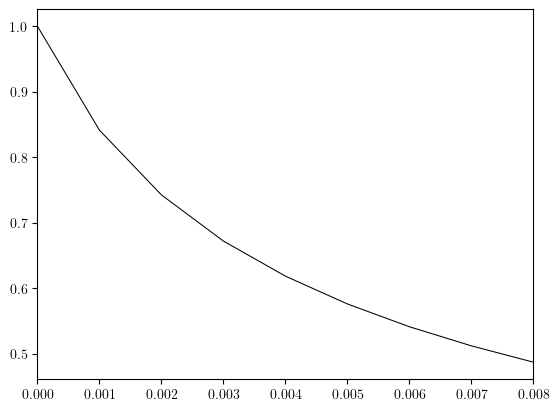

In [4]:
plot_line((uMax.time_series, uMax.value_series))

## Writing criteria